In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-py
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-py (from versions: none)
ERROR: No matching distribution found for opencv-py
Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

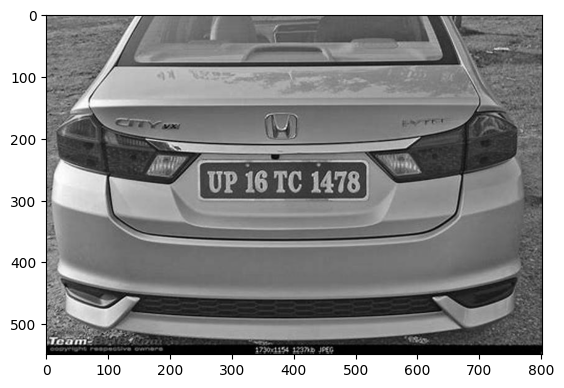

In [ ]:
img = cv2.imread('/content/cars.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

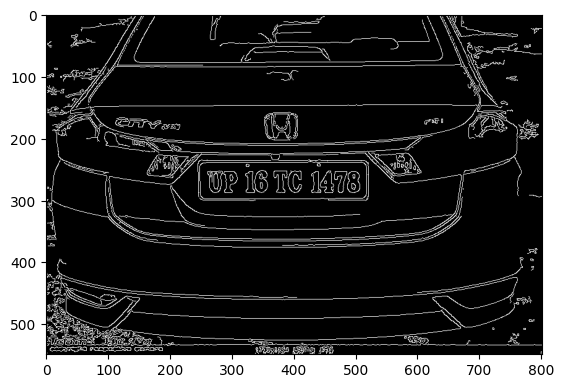

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30 ,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
       location = approx
       break

In [ ]:
location

array([[[518, 246]],

       [[512, 297]],

       [[249, 292]],

       [[259, 239]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

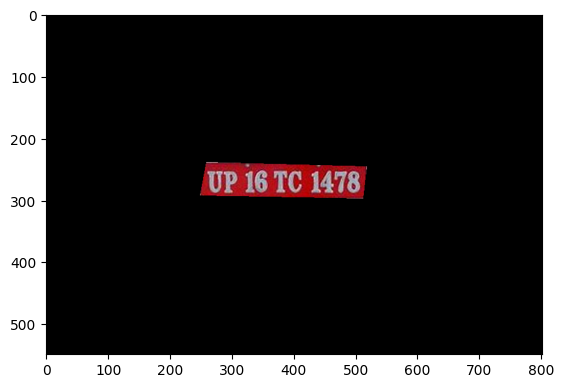

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

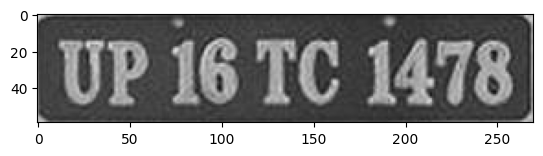

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[6, 4], [266, 4], [266, 58], [6, 58]], 'UP 16 TC 1478', 0.8929937722988155)]

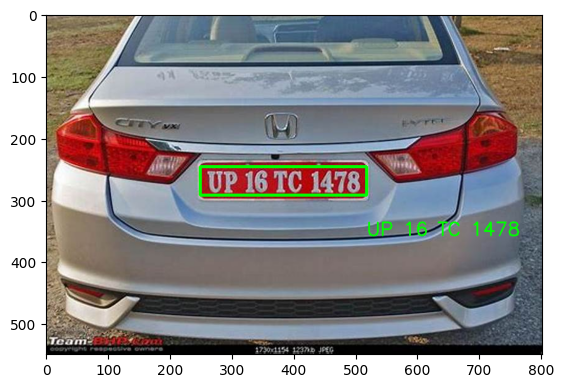

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2)
res = cv2.rectangle(img,tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Load the image
img = cv2.imread('/content/cars.jpeg')


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
# plt.imshow(gray, cmap='gray')
# plt.show()

# Apply bilateral filter for noise reduction
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# Detect edges using Canny edge detection
edged = cv2.Canny(bfilter, 30, 200)

# Display the edged image
# plt.imshow(edged, cmap='gray')
# plt.show()

# Find contours in the image
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None

# Iterate over the contours to find the license plate
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

# Create a mask for the license plate region
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

# Get the bounding box coordinates of the license plate
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))

# Crop the license plate region
cropped_image = gray[x1:x2+1, y1:y2+1]

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the cropped license plate image
result = reader.readtext(cropped_image)

# Print the recognized text
for detection in result:
    text = detection[1]
    print(text)

# Display the cropped license plate image
# plt.imshow(cropped_image, cmap='gray')
# plt.show()

# Define the dictionary of license plate prefixes and their corresponding values
''' plate_values = {
    "AN": "Andaman and Nicobar Islands",
    "AP": "Andhra Pradesh",
    "AR": "Arunachal Pradesh",
    "AS": "Assam",
    "BH": "Bharat For pan-India registration",
    "BR": "Bihar",
    "CH": "Chandigarh",
    "CG": "Chhattisgarh",
    "DD": "Dadra and Nagar Haveli and Daman and Diu",
    "DL": "Delhi",
    "GA": "Goa",
    "GJ": "Gujarat",
    "HR": "Haryana",
    "HP": "Himachal Pradesh",
    "JK": "Jammu and Kashmir",
    "JH": "Jharkhand",
    "KA": "Karnataka",
    "KL": "Kerala",
    "LA": "Ladakh",
    "LD": "Lakshadweep",
    "MP": "Madhya Pradesh",
    "MH": "Maharashtra",
    "MN": "Manipur",
    "ML": "Meghalaya",
    "MZ": "Mizoram",
    "NL": "Nagaland",
    "OD": "Odisha",
    "PY": "Puducherry",
    "PB": "Punjab",
    "RJ": "Rajasthan",
    "SK": "Sikkim",
    "TN": "Tamil Nadu",
    "TS": "Telangana",
    "TR": "Tripura",
    "UP": "Uttar Pradesh",
    "UK": "Uttarakhand",
    "WB": "West Bengal"
}

# Perform OCR on the cropped license plate image
result = reader.readtext(cropped_image)

# Extract the first two letters from the recognized text
recognized_text = result[0][1]
plate_prefix = recognized_text[:2]
print(plate_prefix)

# Check if the extracted prefix is in the dictionary
if plate_prefix in plate_values:
    value = plate_values[plate_prefix]
    print("License plate:", recognized_text)
    print("This car belongs to:", value)
else:
    print("Invalid license plate:", recognized_text)
'''


plate_values = {
    "TS": {
        "state": "Telangana State",
        "districts": {
            "01": "Adilabad district",
            "02": "Karimnagar district",
            "03": "Warangal Urban district",
            "04": "Khammam district",
            "05": "Nalgonda district",
            "06": "Mahbubnagar district",
            "07": "Ranga Reddy",
            "08": "Medchal-Malkajgiri District",
            "09": "Hyderabad Central",
            "10": "Hyderabad North",
            "11": "Hyderabad East",
            "12": "Hyderabad South",
            "13": "Hyderabad West",
            "14": "Reserved for Hyderabad",
            "15": "Sangareddy district",
            "16": "Nizamabad district",
            "17": "Kamareddy district",
            "18": "Nirmal district",
            "19": "Mancherial district",
            "20": "Kumaram Bheem Asifabad district",
            "21": "Jagtial district",
            "22": "Peddapalli district",
            "23": "Sircilla district",
            "24": "Warangal (rural) district",
            "25": "Jayashankar Bhupalpally district",
            "26": "Mahabubabad district",
            "27": "Jangaon district",
            "28": "Bhadradri Kothagudem district",
            "29": "Suryapet district",
            "30": "Yadadri Bhuvanagiri district",
            "31": "Nagarkurnool district",
            "32": "Wanaparthy district",
            "33": "Jogulamba Gadwal district",
            "34": "Vikarabad district",
            "35": "Medak district",
            "36": "Siddipet district"
        }
    },
    "AN": {
        "state": "Andaman and Nicobar Islands",
        "districts": {
            "02": "Nicobar Islands",
            "01": "Port Blair",
        }
    },
    "AP": {
        "state": "Andhra Pradesh",
        "districts": {
            "02": "Anantapur",
            "33": "Gajuwaka",
            "08": "Guntur",
            "07": "Guntur",
            "09": "Hyderabad",
            "12": "Hyderabad",
            "11": "Hyderabad",
            "13": "Hyderabad",
            "04": "Kadapa",
            "14": "Karimnagar",
            "15": "Karimnagar",
            "20": "Khammam",
            "21": "Kurnool",
            "22": "Mahbubnagar",
            "24": "Nalgonda",
            "26": "Nellore",
            "25": "Nizamabad",
            "39": "Prakasam",
            "05": "Rajahmundry",
            "28": "Ranga reddy",
            "29": "Ranga reddy",
            "23": "Sangareddi",
            "10": "Secunderabad",
            "30": "Srikakulam",
            "03": "Tirupati",
            "17": "Vijayawada",
            "18": "Vijayawada",
            "19": "Vijayawada",
            "31": "Visakhapatnam",
            "32": "Visakhapatnam",
            "35": "Vizianagaram",
            "16": "Visakhapatnam",
            "34": "Visakhapatnam",
            "36": "Warangal",
            "37": "Eluru",
            "38": "Eluru",
            "06": "Kakinada",
            "01": "Nirmal",
            "27": "Ongole"

        }
    },
    "AR": {
        "state": "Arunachal Pradesh",
        "districts": {
            "04": "Bomdila",
            "07": "Changlang",
            "12": "Changlang",
            "10": "Dibang Valley",
            "16": "Dibang Valley",
            "05": "East Kameng",
            "01": "Itanagar",
            "02": "Itanagar",
            "15": "Kurung Kumey",
            "11": "Lohit",
            "17": "Lohit",
            "20": "Lohit",
            "06": "Lower Subansiri",
            "09": "Pasighat",
            "03": "Tawang",
            "13": "Tirap",
            "14": "Upper Siang",
            "08": "West Siang"

        }
    },
    "AS": {
        "state": "Assam",
        "districts": {
            "28": "Baksa",
    "32": "Biswanath Chariali",
    "19": "Bongaigaon",
    "11": "Cachar",
    "08": "Cachar",
    "26": "Chirang",
    "13": "Darrang",
    "22": "Dhemaji",
    "17": "Dhubri",
    "06": "Dibrugarh",
    "18": "Goalpara",
    "05": "Golaghat",
    "01": "Guwahati",
    "24": "Hailakandi",
    "25": "Guwahati",
    "03": "Jorhat",
    "09": "Karbi Anglong",
    "10": "Karimganj",
    "16": "Kokrajhar",
    "07": "Lakhimpur(Assam)",
    "21": "Morigaon",
    "02": "Nagaon",
    "14": "Nalbari",
    "04": "Sivasagar",
    "12": "Sonitpur",
    "23": "Tinsukia",
    "27": "Udalguri",
    "15": "Barpeta"

        }
    },
    "BR": {
        "state": "Bihar",
        "districts": {
            "38": "Araria",
    "56": "Arwal",
    "26": "Aurangabad",
    "51": "Banka",
    "45": "Bhabua",
    "22": "Bettiah",
    "10": "Bhagalpur",
    "03": "Bhojpur",
    "44": "Buxar",
    "04": "Chhapra",
    "07": "Darbhanga",
    "24": "Dehri on sone",
    "02": "Gaya",
    "28": "Gopalganj",
    "41": "Gumla",
    "46": "Jamui",
    "16": "Jamshedpur",
    "25": "Jehanabad",
    "39": "Katihar",
    "34": "Khagaria",
    "37": "Kishanganj",
    "53": "Lakhisarai",
    "52": "Lakhisarai",
    "43": "Madhepura",
    "32": "Madhubani",
    "08": "Munger",
    "06": "Muzaffarpur",
    "21": "Nalanda",
    "27": "Nawada",
    "01": "Patna",
    "57": "Rohtas",
    "19": "Saharsa",
    "33": "Samastipur",
    "55": "Sheohar",
    "30": "Sitamarhi",
    "50": "Supaul",
    "31": "Vaishali",
    "18": "West Singhbhum",
    "09": "Begusarai",
    "05": "Motihari",
    "11": "Purnia",
    "29": "Siwan"

        }
    },
    "CH": {
        "state": "Chhattisgarh",
        "districts": {
            "24": "Balod",
    "22": "Baloda Bazar",
    "25": "Bemetara",
    "20": "Bijapur (CH)",
    "10": "Bilaspur",
    "26": "Bilaspur",
    "18": "Dantewada",
    "05": "Dhamtari",
    "07": "Durg",
    "23": "Gariaband",
    "17": "Jagdalpur",
    "11": "Janjgir-Champa",
    "14": "Jashpur",
    "19": "Kanker",
    "09": "Kawardha",
    "27": "Kondagaon",
    "12": "Korba",
    "16": "Koriya",
    "06": "Mahasamund",
    "28": "Mungeli",
    "21": "Narayanpur (CH)",
    "01": "Raipur",
    "02": "Raipur",
    "03": "Raipur",
    "04": "Raipur",
    "29": "Ramanujganj",
    "26": "Sukma",
    "29": "Surajpur",
    "15": "Ambikapur",
    "08": "Rajnandgaon",
    "13": "Raigarh"

        }
    },"GA": {
        "state": "Goa",
        "districts": {
            "04": "Bicholim",
    "10": "Canacona",
    "11": "Dharbandora",
    "12": "Dharbandora",
    "09": "Goa",
    "02": "Margao",
    "08": "Margao",
    "01": "Panaji",
    "07": "Panaji",
    "06": "Vasco Da Gama",
    "03": "Mapusa",
    "05": "Ponda"

        }
    },
    "GJ": {
        "state": "Gujarat",
        "districts": {
            "38": "Ahmedabad",
    "27": "Ahmedabad",
    "01": "Ahmedabad",
    "23": "Anand",
    "08": "Banaskantha",
    "16": "Bharuch",
    "04": "Bhavnagar",
    "12": "Bhuj (Kachchh)",
    "33": "Botad",
    "37": "Chhota Udaipur",
    "30": "Dang",
    "34": "Dwarka",
    "31": "Gandhidham",
    "18": "Gandhinagar",
    "17": "Godhra",
    "10": "Jamnagar",
    "11": "Junagadh",
    "07": "Kheda",
    "35": "Mahisagar",
    "02": "Mehsana",
    "36": "Morbi",
    "22": "Narmada",
    "21": "Navsari",
    "25": "Porbandar",
    "03": "Rajkot",
    "09": "Sabarkantha",
    "28": "Surat",
    "13": "Surendranagar",
    "26": "Tapi",
    "05": "Surat",
    "29": "Vadodara",
    "06": "Vadodara",
    "15": "Valsad",
    "32": "Veraval",
    "14": "Amreli",
    "19": "Bardoli",
    "20": "Dahod",
    "24": "Patan"

        }
    },
    "HR": {
        "state": "Harayana",
        "districts": {
            "54": "Ambala",
    "85": "Ambala",
    "37": "Ambala",
    "01": "Ambala",
    "80": "Barwala",
    "48": "Bhiwani",
    "18": "Bhiwani",
    "17": "Bhiwani",
    "61": "Bhiwani",
    "16": "Bhiwani",
    "70": "Chandigarh",
    "38": "Faridabad",
    "51": "Faridabad",
    "87": "Faridabad",
    "44": "Ellenabad",
    "22": "Fatehabad",
    "28": "Firozpur",
    "23": "Fatehabad",
    "42": "Ganaur",
    "26": "Gurgaon",
    "55": "Gurgaon",
    "72": "Gurgaon",
    "98": "Gurgaon",
    "20": "Hisar",
    "39": "Hisar",
    "53": "Hisar",
    "50": "Hodal",
    "02": "Jagadhri",
    "57": "Jagadhri",
    "58": "Jagadhri",
    "59": "Jagadhri",
    "63": "Jhajjar",
    "77": "Jhajjar",
    "95": "Jhajjar",
    "89": "Jhajjar",
    "31": "Jind",
    "56": "Jind",
    "90": "Jind",
    "14": "Jhajjar",
    "09": "Kaithal",
    "08": "Kaithal",
    "83": "Kaithal",
    "64": "Kaithal",
    "82": "Kanina",
    "45": "Karnal",
    "05": "Karnal",
    "91": "Karnal",
    "75": "Karnal",
    "07": "Kurukshetra",
    "65": "Kurukshetra",
    "97": "Ladwa",
    "34": "Mahendragarh",
    "15": "Meham",
    "74": "Mewat",
    "96": "Mewat",
    "86": "Narnaud",
    "27": "Nuh",
    "03": "Panchkula",
    "06": "Panipat",
    "68": "Panchkula",
    "67": "Panipat",
    "41": "Pehowa",
    "92": "Radaur",
    "47": "Rewari",
    "36": "Rewari",
    "81": "Rewari",
    "46": "Rohtak",
    "12": "Rohtak",
    "43": "Rewari",
    "33": "Safidon",
    "24": "Sirsa",
    "94": "Sirsa",
    "93": "Sohna",
    "10": "Sonipat",
    "69": "Sonipat",
    "79": "Sonipat",
    "71": "Yamuna Nagar",
    "40": "Assandh",
    "29": "Ballabhgarh",
    "13": "Bahadurgarh",
    "19": "Charkhi Dadri",
    "84": "Charkhi Dadri",
    "11": "Gohana",
    "21": "Hansi",
    "49": "Kalka",
    "88": "Kundli",
    "25": "Mandi Dabwali",
    "35": "Narnaul",
    "32": "Narwana",
    "66": "Narnaul",
    "04": "Naraingarh",
    "76": "Pataudi",
    "73": "Palwal",
    "52": "Palwal",
    "30": "Palwal",
    "62": "Samalkha",
    "60": "Samalkha",
    "78": "Shahbad"

        }
    },
    "HP": {
        "state": "Himachal Pradesh",
        "districts": {
            "21": "Barsar",
    "23": "Bilaspur",
    "69": "Bilaspur",
    "44": "Chamba",
    "45": "Chamba",
    "24": "Bilaspur",
    "57": "Chamba",
    "46": "Chamba",
    "89": "Bilaspur",
    "70": "Bilaspur",
    "47": "Dalhousie",
    "04": "Dharamshala",
    "39": "Dharamshala",
    "22": "Hamirpur",
    "55": "Hamirpur",
    "67": "Hamirpur",
    "84": "Hamirpur",
    "74": "Hamirpur",
    "60": "Hamirpur",
    "54": "Kangra",
    "53": "Kangra",
    "56": "Kangra",
    "68": "Kangra",
    "83": "Kangra",
    "88": "Kangra",
    "90": "Kangra",
    "96": "Kangra",
    "97": "Kangra",
    "40": "Kangra",
    "26": "Kinnaur",
    "25": "Kinnaur",
    "27": "Kinnaur",
    "34": "Kullu",
    "35": "Kullu",
    "49": "Kullu",
    "61": "Kullu",
    "66": "Kullu",
    "41": "Lahaul And Spiti",
    "43": "Lahaul And Spiti",
    "42": "Lahaul And Spiti",
    "33": "Mandi",
    "28": "Mandi",
    "58": "Manali",
    "05": "Mandi",
    "30": "Mandi",
    "65": "Mandi",
    "29": "Mandi",
    "32": "Mandi",
    "76": "Mandi",
    "87": "Mandi",
    "82": "Mandi (Rural)",
    "18": "Nahan",
    "71": "Nahan",
    "12": "Nalagarh",
    "37": "Palampur",
    "06": "Rampur Bushahr",
    "16": "Rajgarh",
    "10": "Rohru",
    "09": "Shimla",
    "50": "Shimla",
    "02": "Shimla",
    "52": "Shimla",
    "51": "Shimla",
    "07": "Shimla",
    "08": "Shimla",
    "62": "Shimla",
    "63": "Shimla",
    "77": "Shimla",
    "03": "Shimla",
    "91": "Shimla",
    "92": "Shimla",
    "01": "Shimla",
    "95": "Shimla",
    "85": "Sirmaur",
    "79": "Sirmaur",
    "13": "Solan",
    "15": "Solan",
    "11": "Solan",
    "64": "Solan",
    "93": "Solan",
    "59": "Solan",
    "14": "Solan",
    "94": "Solan",
    "86": "Solan",
    "31": "Surendranagar",
    "20": "Una",
    "78": "Una",
    "80": "Una",
    "72": "Una",
    "19": "Amb",
    "48": "Chamba",
    "81": "Chamba",
    "36": "Dehra Gopipur",
    "73": "Chamba",
    "38": "Nurpur",
    "17": "Paonta Sahib"

        }
    },
    "JH": {
        "state": "Jharkhand",
        "districts": {
            "20": "Bokaro",
    "09": "Bokaro",
    "13": "Chatra",
    "40": "Deoghar",
    "15": "Deoghar",
    "17": "Dhanbad",
    "10": "Dhanbad",
    "04": "Dumka",
    "12": "Dumka",
    "06": "Giridih",
    "07": "Gumla",
    "14": "Gumla",
    "02": "Hazaribagh",
    "13": "Hazaribagh",
    "21": "Jamtara",
    "05": "Jamshedpur",
    "23": "Khunti",
    "47": "Koderma",
    "12": "Koderma",
    "19": "Latehar",
    "03": "Medininagar",
    "15": "Palamu",
    "14": "Ranchi",
    "01": "Ranchi",
    "35": "Sahibganj",
    "18": "Sahibganj",
    "22": "Seraikela-kharsawan",
    "20": "Simdega",
    "23": "Giridih",
    "11": "Giridih",
    "36": "Godda",
    "17": "Godda",
    "42": "Lohardaga",
    "08": "Lohardaga",
    "16": "Pakur",
    "24": "Ramgarh"

        }
    },
    "KA": {
        "state": "Karnataka",
        "districts": {
            "29": "Bagalkot",
    "58": "Bagalkot",
    "24": "Bailhongal",
    "01": "Bangalore",
    "03": "Bangalore",
    "02": "Bangalore",
    "50": "Bangalore",
    "41": "Bangalore",
    "04": "Bangalore",
    "10": "Bangalore",
    "05": "Bangalore",
    "51": "Bangalore",
    "53": "Bangalore",
    "57": "Bangalore",
    "52": "Bangalore",
    "59": "Bangalore",
    "60": "Bangalore",
    "61": "Bangalore",
    "70": "Bantwal",
    "22": "Belgaum",
    "34": "Bellary",
    "39": "Bidar",
    "38": "Bidar",
    "28": "Bijapur",
    "56": "Bidar",
    "68": "Chikkaballapur",
    "18": "Chikmagalur",
    "40": "Chikkaballapur",
    "66": "Chikmagalur",
    "23": "Chikodi",
    "16": "Chitradurga",
    "17": "Davangere",
    "43": "Devanahalli",
    "25": "Dharwad",
    "26": "Gadag",
    "67": "Gulbarga",
    "32": "Gulbarga",
    "49": "Gokak",
    "46": "Hassan",
    "27": "Haveri",
    "13": "Hassan",
    "35": "Hospet",
    "63": "Hubli",
    "48": "Jamakhandi",
    "07": "Kolar",
    "08": "Kolar",
    "37": "Koppal",
    "12": "Madikeri",
    "11": "Mandya",
    "54": "Mandya",
    "19": "Mangalore",
    "09": "Mysore",
    "45": "Mysore",
    "55": "Mysore",
    "36": "Raichur",
    "69": "Ranebennuru",
    "15": "Sagara",
    "14": "Shimoga",
    "31": "Sirsi",
    "62": "Surathkal",
    "06": "Tumkur",
    "64": "Tumkur",
    "20": "Udupi",
    "47": "Uttara Kannada",
    "65": "Uttara Kannada",
    "33": "Yadgir",
    "30": "Karwar",
    "42": "Ramanagara",
    "21": "Puttur",
    "44": "Tiptur"
        }
    },
    "KL": {
        "state": "Kerala",
        "districts": {
            "04": "Alappuzha",
    "66": "Alappuzha",
    "64": "Chalakudy",
    "30": "Chengannur",
    "79": "Ernakulam",
    "07": "Ernakulam",
    "39": "Ernakulam",
    "43": "Ernakulam",
    "46": "Guruvayoor",
    "68": "Idukki",
    "69": "Idukki",
    "06": "Idukki",
    "37": "Idukki",
    "34": "Kanjirappally",
    "13": "Kannur",
    "82": "Kannur",
    "23": "Karunagappally",
    "84": "Kasaragod",
    "14": "Kasaragod",
    "85": "Kasaragod",
    "29": "Kayamkulam",
    "74": "Kattakkada",
    "47": "Kodungallur",
    "02": "Kollam",
    "61": "Kollam",
    "77": "Kollam",
    "44": "Kothamangalam",
    "67": "Kottayam",
    "24": "Kottarakkara",
    "35": "Kottayam",
    "81": "Kozhikode",
    "05": "Kottayam",
    "11": "Kozhikode",
    "56": "Koyilandy",
    "57": "Kozhikode",
    "65": "Malappuram",
    "80": "Malappuram",
    "28": "Mallappally",
    "10": "Malappuram",
    "50": "Mannarkkad",
    "17": "Muvattupuzha",
    "21": "Nedumangad",
    "20": "Neyyattinkara",
    "49": "Palakkad",
    "70": "Palakkad",
    "51": "Ottapalam",
    "09": "Palakkad",
    "42": "Paravur",
    "19": "Parassala",
    "76": "Paravur",
    "03": "Pathanamthitta",
    "83": "Payyanur",
    "78": "Pathanamthitta",
    "53": "Perinthalmanna",
    "54": "Ponnani",
    "73": "Sultan Bathery",
    "58": "Thalassery",
    "01": "Thiruvananthapuram",
    "15": "Thiruvananthapuram",
    "22": "Thiruvananthapuram",
    "08": "Thrissur",
    "55": "Tirur",
    "36": "Vaikom",
    "75": "Varkala",
    "12": "Wayanad",
    "72": "Wayanad",
    "41": "Aluva",
    "26": "Adoor",
    "63": "Angamaly",
    "16": "Attingal",
    "33": "Changanassery",
    "32": "Cherthala",
    "45": "Irinjalakuda",
    "60": "Kanhangad",
    "71": "Nilambur",
    "31": "Mavelikara",
    "52": "Pattambi",
    "40": "Perumbavoor",
    "62": "Ranni",
    "25": "Punalur",
    "27": "Thiruvalla",
    "38": "Thodupuzha",
    "59": "Taliparamba",
    "18": "Vadakara",
    "48": "Wadakkanchery"
        }
    },
    "MP": {
        "state": "Madhya Pradesh",
        "districts": {
            "69": "Alirajpur",
    "70": "Agar Malwa",
    "65": "Anuppur",
    "67": "Ashoknagar",
    "50": "Balaghat",
    "40": "Barwani",
    "48": "Betul",
    "01": "Bhopal",
    "02": "Bhopal",
    "04": "Bhopal",
    "03": "Bhopal",
    "28": "Chhindwara",
    "32": "Datia",
    "34": "Damoh",
    "41": "Dewas",
    "55": "Dewas",
    "11": "Dhar",
    "46": "Dindori",
    "52": "Dindori",
    "08": "Guna",
    "07": "Gwalior",
    "05": "Hoshangabad",
    "09": "Indore",
    "20": "Jabalpur",
    "21": "Katni",
    "12": "Khandwa",
    "10": "Khargone",
    "45": "Mandla",
    "51": "Mandla",
    "14": "Mandsaur",
    "06": "Morena",
    "49": "Narsinghpur",
    "44": "Neemuch",
    "35": "Panna",
    "38": "Raisen",
    "39": "Rajgarh",
    "43": "Ratlam",
    "17": "Rewa",
    "15": "Sagar",
    "19": "Satna",
    "37": "Sehore",
    "18": "Shahdol",
    "22": "Seoni",
    "42": "Shajapur",
    "31": "Sheopur",
    "53": "Sidhi",
    "47": "Sidhi",
    "33": "Shivpuri",
    "30": "Tikamgarh",
    "36": "Tikamgarh",
    "13": "Ujjain",
    "54": "Umaria",
    "68": "Burhanpur",
    "16": "Chattarpur",
    "66": "Singrauli"
        }
    },
    "MH": {
        "state": "Maharashtra",
        "districts": {
            "16": "Ahmednagar",
    "30": "Akola",
    "44": "Ambajogai",
    "27": "Amravati",
    "20": "Aurangabad",
    "28": "Buldhana",
    "34": "Chandrapur",
    "18": "Dhule",
    "33": "Gadchiroli",
    "35": "Gondia",
    "38": "Hingoli",
    "19": "Jalgaon",
    "09": "Kolhapur",
    "24": "Latur",
    "47": "Mumbai",
    "02": "Mumbai",
    "03": "Mumbai",
    "01": "Mumbai",
    "31": "Nagpur",
    "40": "Nagpur",
    "26": "Nanded",
    "15": "Nashik",
    "51": "Nashik",
    "43": "Navi Mumbai",
    "06": "Pen",
    "14": "Pimpri chinchwad",
    "12": "Pune",
    "53": "Pune",
    "54": "Pune",
    "55": "Pune",
    "08": "Ratnagiri",
    "10": "Sangli",
    "11": "Satara",
    "07": "Sindhudurg",
    "13": "Solapur",
    "04": "Thane",
    "32": "Wardha",
    "29": "Yavatmal",
    "45": "Akluj",
    "42": "Baramati",
    "23": "Beed",
    "36": "Bhandara",
    "49": "Bhandara",
    "21": "Jalna",
    "50": "Karad",
    "05": "Kalyan",
    "41": "Malegaon",
    "39": "Nandurbar",
    "46": "Panvel",
    "22": "Parbhani",
    "52": "Parbhani",
    "25": "Osmanabad",
    "17": "Shrirampur",
    "48": "Vasai",
    "37": "Washim"
        }
    },
    "MN": {
        "state": "Manipur",
        "districts": {
            "02": "Churachandpur",
    "01": "Imphal",
    "06": "Imphal",
    "05": "Imphal",
    "04": "Thoubal",
    "07": "Ukhrul"
        }
    },
    "ML": {
        "state": "Meghalaya",
        "districts": {
            "07": "East Garo Hills",
    "05": "East Khasi Hills",
    "04": "Jaintia Hills",
    "10": "Nongpoh",
    "01": "Shillong",
    "02": "Shillong",
    "56": "Shillong",
    "03": "Shillong",
    "09": "South Garo Hills",
    "13": "West Garo Hills"
        }
    },
    "MZ": {
        "state": "Mizoram",
        "districts": {
            "01": "Aizawl",
    "04": "Champhai",
    "05": "Kolasib",
    "07": "Lawngtlai",
    "02": "Lunglei",
    "08": "Mamit",
    "03": "Saiha",
    "06": "Serchhip"
        }
    },
    "NL": {
        "state": "Nagaland",
        "districts": {
            "07": "Dimapur",
    "01": "Kohima",
    "04": "Mon",
    "02": "Mokokchung",
    "08": "Phek",
    "03": "Tuensang",
    "05": "Wokha",
    "06": "Zunheboto"
        }
    },
    "OR": {
        "state": "Orrissa",
        "districts": {
            "19": "Angul",
    "35": "Angul",
    "03": "Balangir",
    "01": "Balasore",
    "17": "Bargarh",
    "22": "Bhadrak",
    "32": "Bhanjanagar",
    "02": "Bhubaneswar",
    "27": "Boudh",
    "04": "Chandrakona",
    "05": "Cuttack",
    "28": "Debagarh",
    "07": "Gajapati",
    "07": "Ganjam",
    "21": "Jagatsinghpur",
    "23": "Jharsuguda",
    "08": "Kalahandi",
    "09": "Kendujhar",
    "29": "Kendrapara",
    "10": "Koraput",
    "30": "Malkangiri",
    "11": "Mayurbhanj",
    "24": "Nabarangpur",
    "26": "Nuapada",
    "12": "Phulbani",
    "13": "Puri",
    "18": "Rayagada",
    "14": "Rourkela",
    "15": "Sambalpur",
    "31": "Sonepur",
    "16": "Sundergarh",
    "06": "Dhenkanal",
    "04": "Jajpur",
    "25": "Nayagarh"
        }
    },
    "PB": {
        "state": "Punjab",
        "districts": {
            "15": "Abohar",
    "48": "Amloh",
    "02": "Amritsar",
    "17": "Amritsar",
    "14": "Amritsar",
    "63": "Amritsar",
    "16": "Anandpur Sahib",
    "73": "Barnala",
    "18": "Batala",
    "45": "Bathinda",
    "03": "Bathinda",
    "80": "Bathinda",
    "01": "Chandigarh",
    "52": "Dera Bassi",
    "70": "Dera Bassi",
    "68": "Dhar",
    "59": "Dhuri",
    "79": "Faridkot",
    "04": "Faridkot",
    "05": "Firozpur",
    "77": "Firozpur",
    "23": "Fatehgarh Sahib",
    "49": "Fatehgarh",
    "24": "Garhshanker",
    "06": "Gurdaspur",
    "58": "Gurdaspur",
    "07": "Hoshiarpur",
    "62": "Jaitu",
    "08": "Jalandhar",
    "67": "Jalandhar",
    "90": "Jalandhar",
    "09": "Kapurthala",
    "57": "Kapurthala",
    "26": "Khanna",
    "10": "Ludhiana",
    "91": "Ludhiana",
    "55": "Ludhiana",
    "50": "Mansa",
    "51": "Mansa",
    "31": "Mansa",
    "29": "Moga",
    "69": "Moga",
    "65": "Mohali",
    "54": "Mukerian",
    "34": "Nabha",
    "74": "Nangal",
    "32": "Nawanshahr",
    "20": "Nawanshahr",
    "66": "Nihal Singh Wala",
    "11": "Patiala",
    "42": "Patiala",
    "35": "Pathankot",
    "38": "Patti",
    "37": "Phillaur",
    "56": "Raikot",
    "40": "Rampura Phul",
    "71": "Rupnagar",
    "12": "Rupnagar",
    "87": "Rupnagar",
    "43": "Samrala",
    "13": "Sangrur",
    "28": "Sangrur",
    "44": "Sangrur",
    "64": "Sangrur",
    "75": "Sangrur",
    "76": "Sangrur",
    "30": "Sri Muktsar Sahib",
    "60": "Sri Muktsar Sahib",
    "41": "Sultanpur Lodhi",
    "46": "Tarn Taran",
    "88": "Tarn Taran",
    "19": "Barnala",
    "21": "Dasuya",
    "22": "Fazilka",
    "25": "Jagraon",
    "61": "Jalalabad",
    "27": "Kharar",
    "53": "Malout",
    "33": "Nakodar",
    "72": "Patran",
    "36": "Phagwara",
    "39": "Rajpura",
    "47": "Zira"
        }
    },
    "RJ": {
        "state": "Rajasthan",
        "districts": {
            "01": "Ajmer",
    "48": "Ajmer",
    "02": "Alwar",
    "03": "Banswara",
    "06": "Bhilwara",
    "07": "Bikaner",
    "08": "Bundi",
    "09": "Chittorgarh",
    "44": "Churu",
    "11": "Dholpur",
    "31": "Hanumangarh",
    "14": "Jaipur",
    "47": "Jaipur",
    "15": "Jaisalmer",
    "16": "Jalore",
    "46": "Jalore",
    "18": "Jhunjhunu",
    "53": "Jhunhunu",
    "19": "Jodhpur",
    "34": "Karauli",
    "42": "Kishangarh",
    "20": "Kota",
    "21": "Nagaur",
    "49": "Nohar",
    "50": "Nokha",
    "22": "Pali",
    "43": "Phalodi",
    "35": "Pratapgarh(RJ)",
    "33": "Ramganj Mandi",
    "38": "Rawatbhata",
    "23": "Sikar",
    "13": "Sri Ganganagar",
    "27": "Udaipur",
    "39": "Balotra",
    "28": "Baran",
    "04": "Barmer",
    "36": "Beawar",
    "05": "Bharatpur",
    "40": "Bhiwadi",
    "10": "Churu",
    "29": "Dausa",
    "12": "Dungarpur",
    "37": "Didwana",
    "41": "Chomu",
    "17": "Jhalawar",
    "32": "Kotputli",
    "30": "Rajsamand",
    "25": "Sawai Madhopur",
    "52": "Shahpura",
    "51": "Shahpura",
    "24": "Sirohi",
    "26": "Tonk"
        }
    },
    "SK": {
        "state": "Sikkim",
        "districts": {
            "08": "East Sikkim",
    "01": "Gangtok",
    "04": "Gangtok",
    "05": "Gangtok",
    "02": "Gangtok",
    "03": "Gangtok"
        }
    },
    "TN": {
        "state": "Tamil Nadu",
        "districts": {
            "61": "Ariyalur",
    "77": "Attur",
    "19": "Chengalpattu",
    "01": "Chennai",
    "02": "Chennai",
    "03": "Chennai",
    "04": "Chennai",
    "11": "Chennai",
    "06": "Chennai",
    "13": "Chennai",
    "14": "Chennai",
    "05": "Chennai",
    "22": "Chennai",
    "85": "Chennai",
    "09": "Chennai",
    "07": "Chennai",
    "10": "Chennai",
    "38": "Coimbatore",
    "66": "Coimbatore",
    "99": "Coimbatore",
    "31": "Cuddalore",
    "91": "Cuddalore",
    "29": "Dharmapuri",
    "57": "Dindigul",
    "33": "Erode",
    "56": "Erode",
    "86": "Erode",
    "43": "Gudalur",
    "36": "Gobichettipalayam",
    "21": "Kanchipuram",
    "87": "Kanchipuram",
    "47": "Karur",
    "96": "Kovilpatti",
    "24": "Krishnagiri",
    "58": "Madurai",
    "64": "Madurai",
    "75": "Marthandam",
    "59": "Melur",
    "51": "Nagapattinam",
    "82": "Nagapattinam",
    "74": "Nagercoil",
    "28": "Namakkal",
    "88": "Namakkal",
    "94": "Palani",
    "46": "Perambalur",
    "60": "Periyakulam",
    "55": "Pudukkottai",
    "12": "Poonamallee",
    "65": "Ramanathapuram",
    "73": "Ranipet",
    "93": "Salem",
    "52": "Salem",
    "54": "Salem",
    "90": "Salem",
    "79": "Sankarankovil",
    "27": "Salem",
    "30": "Salem",
    "84": "Sivakasi",
    "63": "Sivaganga",
    "95": "Sivakasi",
    "48": "Srirangam",
    "37": "Sulur",
    "76": "Tenkasi",
    "49": "Thanjavur",
    "69": "Thoothukudi",
    "92": "Thoothukudi",
    "16": "Tindivanam",
    "45": "Tiruchirappalli",
    "81": "Tiruchirappalli",
    "72": "Tirunelveli",
    "39": "Tiruppur",
    "34": "Tiruchengode",
    "42": "Tiruppur",
    "20": "Tiruvallur",
    "25": "Tiruvannamalai",
    "97": "Tiruvannamalai",
    "78": "Udumalaipettai",
    "23": "Vellore",
    "83": "Vellore",
    "15": "Viluppuram",
    "32": "Viluppuram",
    "67": "Virudhunagar",
    "70": "hosur",
    "68": "kumbakonam",
    "40": "mettupalayam",
    "41": "pollachi",
    "18": "red hills",
    "50": "thiruvarur"
        }
    },
    "TR": {
        "state": "Tripura",
        "districts": {
            "01": "Agartala",
    "06": "Khowai",
    "02": "North Tripura",
    "07": "Rupnagar",
    "08": "South Tripura",
    "04": "Udaipur",
    "03": "Udaipur",
    "05": "Dharmanagar"
        }
    },
    "UP": {
        "state": "Uttar Pradesh",
        "districts": {
            "81": "Aligarh",
    "70": "Allahabad",
    "80": "Agra",
    "45": "Ambedkar Nagar",
    "23": "Amroha",
    "79": "Auraiya",
    "28": "Ayodhya",
    "50": "Azamgarh",
    "40": "Bahraich",
    "17": "Baghpat",
    "47": "Balrampur",
    "41": "Barabanki",
    "51": "Basti",
    "66": "Bhadohi",
    "20": "Bijnor",
    "67": "Chandauli",
    "96": "Chitrakoot",
    "52": "Deoria",
    "25": "Bareilly",
    "82": "Etah",
    "75": "Etawah",
    "42": "Faizabad",
    "71": "Fatehpur",
    "83": "Firozabad",
    "76": "Farrukhabad",
    "14": "Ghaziabad",
    "61": "Ghazipur",
    "53": "Gorakhpur",
    "18": "Greater Noida",
    "91": "Hamirpur",
    "30": "Hardoi",
    "37": "Hapur",
    "92": "Jalaun",
    "93": "Jhansi",
    "77": "Kanpur",
    "78": "Kanpur",
    "74": "Kannauj",
    "87": "Kasganj",
    "73": "Kaushambi",
    "31": "Lakhimpur Kheri",
    "94": "Lalitpur",
    "36": "Lucknow",
    "32": "Lucknow",
    "56": "Maharajganj",
    "54": "Mau",
    "85": "Mathura",
    "15": "Meerut",
    "63": "Mirzapur",
    "21": "Moradabad",
    "12": "Muzaffarnagar",
    "16": "Noida",
    "57": "Padrauna",
    "26": "Pilibhit",
    "72": "Pratapgarh",
    "33": "Raebareli",
    "11": "Saharanpur",
    "38": "Sambhal",
    "58": "Sant Kabir Nagar",
    "27": "Shahjahanpur",
    "19": "Shamli",
    "46": "Shravasti",
    "55": "Siddharthnagar",
    "34": "Sitapur",
    "64": "Sonbhadra",
    "04": "Udham Singh Nagar",
    "65": "Varanasi",
    "90": "Banda",
    "60": "Ballia",
    "24": "Budaun",
    "13": "Bulandshahr",
    "43": "Gonda",
    "86": "Hathras",
    "62": "Jaunpur",
    "95": "Mahoba",
    "84": "Mainpuri",
    "22": "Rampur",
    "44": "Sultanpur",
    "35": "Unnao"
        }
    },
    "UK": {
        "state": "Uttarkhand",
        "districts": {
            "01": "Almora",
    "02": "Bageshwar",
    "11": "Chamoli",
    "03": "Champawat",
    "07": "Dehradun",
    "08": "Haridwar",
    "15": "Kotdwara",
    "04": "Nainital",
    "12": "Pauri",
    "05": "Pithoragarh"
        }
    },
    "UP": {
        "state": "Uttar Pradesh",
        "districts": {
            "02": "Nicobar Islands",
            "01": "Port Blair",
        }
    },

    # Add more entries for other states and union territories
}
plate = result[0][1]  # Extracting the license plate number from the result
plate = plate.replace(" ", "")
plate_prefix = plate[:2]
plate_digits = plate[2:4]

if plate_prefix in plate_values:
    state = plate_values[plate_prefix]["state"]
    districts = plate_values[plate_prefix]["districts"]

    if plate_digits in districts:
        district = districts[plate_digits]
        print("License Plate:", plate)
        print("State:", state)
        print("District:", district)
    else:
        print("Invalid district code:", plate_digits)
else:
    print("Invalid license plate prefix:", plate_prefix)

UP 16 TC 1478
Invalid district code: 16


In [ ]:
districts = {
    'Adilabad district': 'TS-1',
    'Mancherial district': 'TS-19',
    'Karimnagar district': 'TS-2',
    'Kumaram Bheem Asifabad district': 'TS-20',
    'Warangal Urban district': 'TS-3',
    'Jagtial district': 'TS-21',
    'Khammam district': 'TS-4',
    'Peddapalli district': 'TS-22',
    'Nalgonda district': 'TS-5',
    'Sircilla district': 'TS-23',
    'Mahbubnagar district': 'TS-6',
    'Warangal (rural) district': 'TS-24',
    'Ranga Reddy': 'TS-7',
    'Jayashankar Bhupalpally district': 'TS-25',
    'Medchal-Malkajgiri District': 'TS-8',
    'Mahabubabad district': 'TS-26',
    'Hyderabad Central': 'TS-9',
    'Jangaon district': 'TS-27',
    'Hyderabad North': 'TS-10',
    'Bhadradri Kothagudem district': 'TS-28',
    'Hyderabad East': 'TS-11',
    'Suryapet district': 'TS-29',
    'Hyderabad South': 'TS-12',
    'Yadadri Bhuvanagiri district': 'TS-30',
    'Hyderabad West': 'TS-13',
    'Nagarkurnool district': 'TS-31',
    'Reserved for Hyderabad': 'TS-14',
    'Wanaparthy district': 'TS-32',
    'Sangareddy district': 'TS-15',
    'Jogulamba Gadwal district': 'TS-33',
    'Nizamabad district': 'TS-16',
    'Vikarabad district': 'TS-34',
    'Kamareddy district': 'TS-17',
    'Medak district': 'TS-35',
    'Nirmal district': 'TS-18',
    'Siddipet district': 'TS-36'
}
